<a href="https://colab.research.google.com/github/fcojquesada/Linear-Regression-Pyhton-Colab/blob/main/Practice_Multi_Linear_Regression_Real_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Exploring Raw data. Cleanning

In [3]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


We remove the variable doesn't give us a lot of information

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


Way to search for missing values

In [5]:
data.isnull().sum()#To how many values are missing
data['Price'].isnull().sum()/data['Brand'].count()#Percentage values are missing

0.03958573072497123

A rule of thumb is that if you are removing less than 5 percent of the observations you are free to

just remove all observations that have missing values.

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###Exploring de PDFs (Probability distribution functions)

I'll print the probability distribution functions for each feature as we discuss them.
We would be looking for a normal distribution price however has an exponential one.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


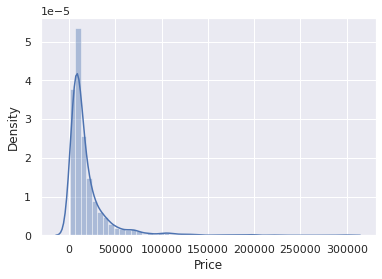

In [8]:
sns.distplot(data_no_mv['Price'])

Dealing with outliers

Obviously we have a few outliers in the price variable outliers or observations that lie on abnormal

distance from other observations in the data they will affect the regression dramatically in cost coefficients

to be inflated as the regression will try to place the line closer to those values.

One way to deal with that seamlessly is to remove the top 1 percent of observations the simplest way

to do that with code is through the quantized method.

It takes one argument the quintile you can input values from 0 to 1.

If you input zero point to 5 you will get the 25th percentile.

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_clean_price = data_no_mv[data_no_mv['Price']<q]
data_clean_price.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


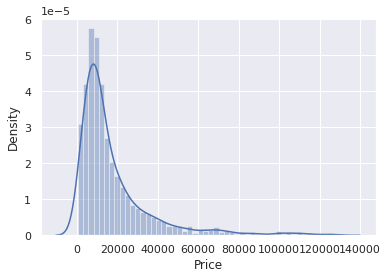

In [10]:
sns.distplot(data_clean_price['Price'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


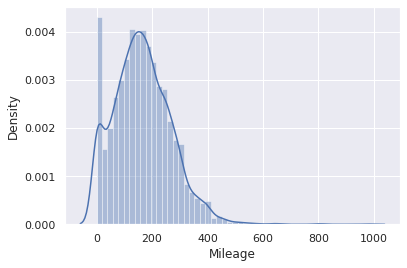

In [11]:
sns.distplot(data_clean_price['Mileage'])

However we have a similar issue with mileage engine volume and year.

We can see that the situation with mileage is almost identical from its PD f therefore we can deal with

it in the same way by keeping only the data lower than the ninety ninth percentile

In [12]:
q = data_clean_price['Mileage'].quantile(0.99)
data_clean_mileage = data_clean_price[data_clean_price['Mileage']<q]
data_clean_mileage.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


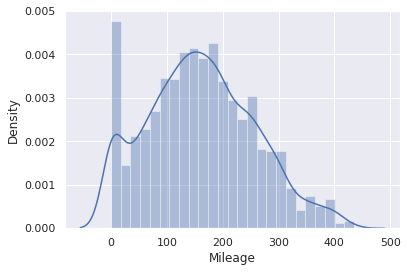

In [13]:
sns.distplot(data_clean_mileage['Mileage'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


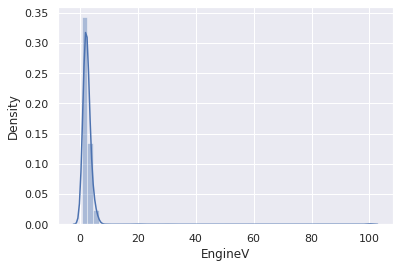

In [14]:
sns.distplot(data_clean_mileage['EngineV'])

In [15]:
data_clean_engineV = data_clean_mileage[data_clean_mileage['EngineV']<6.5]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


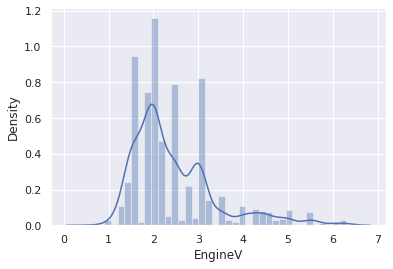

In [16]:
sns.distplot(data_clean_engineV['EngineV'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


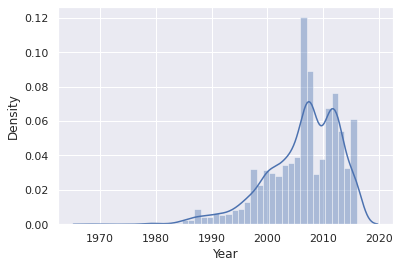

In [17]:
sns.distplot(data_clean_engineV['Year'])

The problem with year is it's on the low end.

Most cars are newer but there seem to be a few vintage cars this time.

I'll take the first percentile and then we'll keep all observations that are higher we will finish off

by creating a data variable and we will reset the index.

In [18]:
q = data_clean_engineV['Year'].quantile(0.01)
data_clean_year = data_clean_engineV[data_clean_engineV['Year']>q]
data_clean_year.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


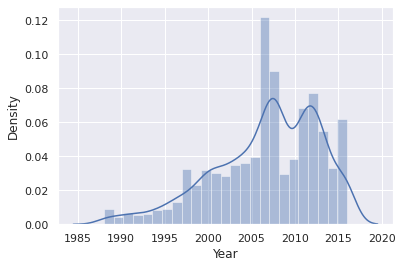

In [19]:
sns.distplot(data_clean_year['Year'])

In [20]:
data_clean = data_clean_year.reset_index(drop=True)
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS Assumptions

###Check for Linearity

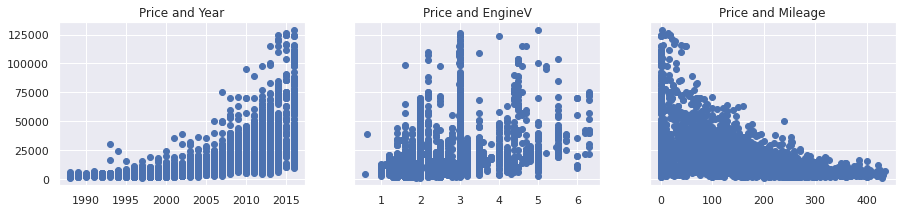

In [21]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_clean['Year'], data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can spot patterns but definitely not linear ones.

We know we should not run a linear regression in this case.

We should first transform one or more variables recall the distribution plot of price to all these plots

are pointing us towards the idea that price is not normally distributed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


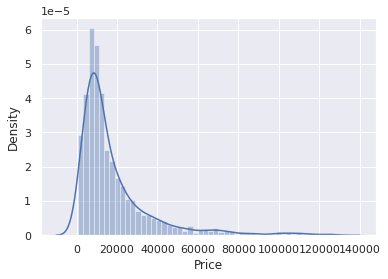

In [22]:
sns.distplot(data_clean['Price']) #this plot indicates it is not normally distributed. the pattern it's quite exponential

###Relaxing the Assumption non linear with a log transformation

In [23]:
log_price = np.log(data_clean['Price'])
data_clean['log_price'] = log_price
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


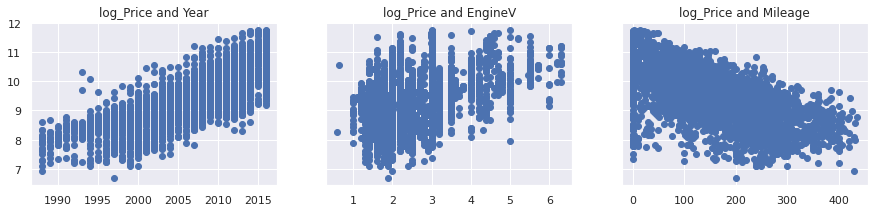

In [24]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_clean['Year'], data_clean['log_price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['log_price'])
ax2.set_title('log_Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['log_price'])
ax3.set_title('log_Price and Mileage')

plt.show()

we can see a linear pattern in all plots.

Now the lines fit the data so much better.

In [25]:
data_cleaned = data_clean.drop(['Price'],axis=1)

In [26]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


###Multicollinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [30]:
data_no_multicolinearity = data_cleaned.drop(['Year'],axis = 1)

In [31]:
data_no_multicolinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


###Dummy Variables

In [32]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


###Check VIF including the dummies

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =data_with_dummies[['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [35]:
vif

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [36]:
data_with_dummies_no_multicolinearity = data_with_dummies.drop(['Registration_yes','EngineV'],axis = 1)

In [37]:
data_with_dummies_no_multicolinearity

,Mileage,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3863,35,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3864,9,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3865,1,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


###Rearrange the Columns

In [38]:
data_with_dummies_no_multicolinearity.columns.values

array(['Mileage', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol'], dtype=object)

In [39]:
cols = ['log_price', 'Mileage',  'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol']

In [86]:
data_prepocessed = data_with_dummies[cols]
data_prepocessed.head()

,log_price,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1


#Linear Regression Model

###Declare the inputs and the targets

In [88]:
targets = data_prepocessed['log_price']
inputs = data_prepocessed.drop(['log_price'],axis=1)

###Scale the data

In [89]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Standarize all the inputs

In [90]:
inputs_scaled = scaler.transform(inputs)

###Train test split

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size = 0.2, random_state=365)

#Create the Regression

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_hat = reg.predict(x_train)

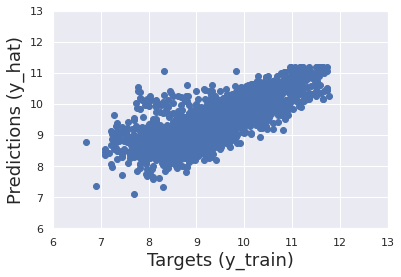

In [94]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We can clearly see that the points are situated around the 45 degree line.

So our model has passed this first check

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

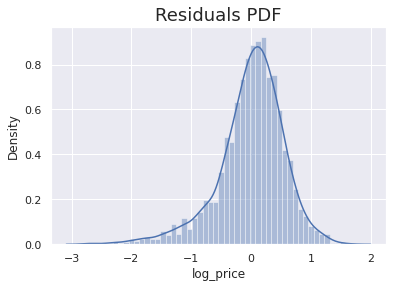

In [95]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

Another popular check is the residual plot the residuals are the differences between the targets and

the predictions.

A residual plot refers to the distribution of the residuals.

Here it is from the regression assumptions we know that the errors must be normally distributed with

a mean of zero the residuals or the estimates of the errors so we would expect the same from them.

The result looks quite normal in the sense of normally distributed the mean seems to be 0

%%html
<span style="color:red">The only possible issue could be that there is a much longer tail on the negative side.</span>

Therefore there are certain observations for which why train minus y hat is much lower than the mean.

This implies that those predictions tend to overestimate the targets from the fact that there are no

such observations on the right side.

We conclude that the predictions rarely underestimate the targets.


In [96]:
reg.score(x_train,y_train)

0.5924410029010847

###Finding the Weights and Bias

In [97]:
reg.intercept_ ### Bias

9.418387481256381

In [98]:
reg.coef_  ### Weights

array([-0.49903906,  0.03373814,  0.09175068, -0.15126781, -0.17800305,
       -0.02351983, -0.08436253, -0.24971485, -0.14347932, -0.3107584 ,
       -0.23636452, -0.21370913, -0.0523507 , -0.03020827, -0.07075236])

In [101]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.499039
1,Brand_BMW,0.033738
2,Brand_Mercedes-Benz,0.091751
3,Brand_Mitsubishi,-0.151268
4,Brand_Renault,-0.178003
5,Brand_Toyota,-0.023520
6,Brand_Volkswagen,-0.084363
7,Body_hatch,-0.249715
8,Body_other,-0.143479
9,Body_sedan,-0.310758


In [103]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

There were seven brands BMW Mercedes Audi Toyota Renault old Volkswagen and Mitsubishi.

But looking at the weights table we realized that Audi was the dropped one.

Therefore whenever all other dummies are zero Audi is one.

So Audi is the benchmark.

In [104]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

Benchmark for the body is crossover

In [105]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

Benchmark for Engine Type is Diesel